In [1]:
#FCM(Fuzzy C-Means)法
import numpy as np

"""
u:メンバシップ値
"""
def FCM(K,n,x,theta):
    #step1
    """
    セントロイドの個数Kを指定し, 各データ点に対して
    クラスタ所属確率(メンバシップ)をランダムに割り当てる
    """
    u = np.zeros((K,n))
    tmp = np.round(np.random.rand(K,n),2)
    u = np.round(tmp/np.sum(tmp, axis=0, keepdims=True),2)
    u_old = np.copy(u)
    
    #step2
    """
    クラスタのセントロイドを計算する
    """
    iter_max = 100
    l_fcm = np.inf
    count = 0
    tmp_1 = 0
    tmp_2 = 0
    b = np.zeros((K,x.shape[1]))
    while count<iter_max:
        """
        for k in range(K):
            for  i in range(n):
                tmp_1 = tmp_1 + u[k,i]**theta
                tmp_2 = tmp_2 + ((u[k,i]**theta)*x[i])
            b[k] = tmp_2/tmp_1
        
        #print("b=",b)
        
        """
        b = np.dot((u**theta),x)/np.sum(u**theta, axis=1, keepdims=True)
            
        #step3
        """
        各データ点ののクラスタ所属確率を更新する
        """
        
        for i in range(n):
            for k in range(K):
                tmp_3 = 0
                tmp_1 = np.linalg.norm(x[i,:]-b[k,:])
                for l in range(K):
                    tmp_2 = np.linalg.norm(x[i,:]-b[l,:])
                    if tmp_2 < 1e-6: #分母が0にならないための例外処理
                        tmp_2 = 1e-6
                    tmp_3 = tmp_3 + (tmp_1/tmp_2)**(2/(theta-1))
                u[k,i] = np.round(tmp_3**(-1),3)
    
        #step4
        """
        クラスタの所属確率の係数が変化しなくなるか, 
        ユーザー定義の許容値またはイテレーションの
        最大回数に達するまでは, step2~3を繰り返す
    
        """
        L_FCM = 0
        for i in range(n):
            for k in range(K):
                dis = np.linalg.norm(x[i,:]-b[k,:])**2
                L_FCM = L_FCM + ((u[k,i])**theta) * dis
        
        if np.abs(l_fcm-L_FCM)<1e-6 and np.max(np.abs(u-u_old))<1e-6:
            return u,b
        
        u_old = np.copy(u)
        l_fcm = L_FCM
        count+=1
    
    print(count)
    return u,b
            

In [3]:
#妥当性基準1:メンバシップのクリスプ度
"""
PC(Partition Coefficient):分割係数
PE(Partition Entropy):分割エントロピー
"""
import math

def PartitionCoefficient(u):
    n=u.shape[1]
    C=u.shape[0]
    tmp=0
    for c in range(C):
        for i in range(n):
            tmp+=u[c,i]**2
    PC=tmp/n
    return PC

def PartitionEntropy(u):
    n=u.shape[1]
    C=u.shape[0]
    tmp=0
    for c in range(C):
        for i in range(n):
            if u[c,i]!=0:
                tmp+=u[c,i]*math.log(u[c,i])
    PE=-tmp/n
    return PE

In [4]:
#妥当性基準2:幾何学的特性
"""
XB:Xie-Beni index
compactness:クラスタ凝集度→FCM目的関数
separateness:クラスタ間乖離度→クラスタ中心間距離
"""
def XieBeni(x,b,u):
    n=u.shape[1]
    C=u.shape[0]
    tmp=0
    inf=999
    for c in range(C):
        for i in range(n):
            tmp+=u[c,i]**2 * np.linalg.norm(x[i,:]-b[c,:])**2
    compactness = tmp/n
    tmp=0
    separateness=inf
    for i in range(C-1):
        for j in range(i+1,C):
            tmp = np.linalg.norm(b[i,:]-b[j,:])
            if separateness > tmp:
                separateness = tmp
    XB = compactness/(n*separateness)
    return XB

In [5]:
#main
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

iris_df = sns.load_dataset("iris")
x_df = iris_df.drop(["species"],axis=1)
#下記のコードは散布図を表示するときに用いた
#x_df = iris_df.drop(["petal_length","petal_width","species"],axis=1)
display(x_df.head())

K = 3 #セントロイド(クラスタの中心)の個数 => クラスタ数 
n = x_df.shape[0]  #データ点の個数
theta = 3 #Θ
x = x_df.to_numpy()
clusters, centroids = FCM(K,n,x,theta)
print(centroids.shape)
print(clusters)
#print(clusters.shape)
print(np.sum(clusters, axis=0, keepdims=True))


"""
label = np.argmax(clusters, axis=0)

plt.scatter(x[:,0],x[:,1], c=label, alpha=0.2)
plt.scatter(centroids[:,0],centroids[:,1],s=50, marker="*", c="red")
  
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("clustering results by Fuzzy C-Means")    
fig.show()

"""

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


(3, 4)
[[0.92  0.823 0.833 0.798 0.9   0.728 0.831 0.973 0.725 0.847 0.795 0.892
  0.807 0.712 0.667 0.619 0.747 0.92  0.686 0.827 0.8   0.849 0.772 0.835
  0.798 0.817 0.911 0.895 0.898 0.835 0.833 0.815 0.733 0.683 0.857 0.852
  0.785 0.878 0.739 0.946 0.903 0.633 0.763 0.831 0.748 0.811 0.82  0.816
  0.821 0.93  0.128 0.108 0.108 0.158 0.099 0.064 0.106 0.323 0.111 0.185
  0.286 0.074 0.162 0.076 0.201 0.126 0.089 0.122 0.113 0.162 0.104 0.105
  0.098 0.083 0.103 0.117 0.112 0.088 0.051 0.231 0.19  0.213 0.132 0.096
  0.116 0.115 0.111 0.114 0.117 0.145 0.109 0.074 0.118 0.314 0.095 0.099
  0.081 0.078 0.358 0.093 0.1   0.106 0.076 0.072 0.056 0.134 0.174 0.113
  0.085 0.117 0.078 0.076 0.026 0.116 0.119 0.075 0.053 0.153 0.15  0.115
  0.062 0.116 0.142 0.092 0.051 0.094 0.091 0.093 0.061 0.094 0.108 0.153
  0.064 0.093 0.109 0.124 0.09  0.062 0.093 0.047 0.059 0.083 0.106 0.069
  0.079 0.069 0.098 0.065 0.094 0.1  ]
 [0.033 0.072 0.069 0.082 0.041 0.112 0.069 0.011 0.113 0.062 0.08

'\nlabel = np.argmax(clusters, axis=0)\n\nplt.scatter(x[:,0],x[:,1], c=label, alpha=0.2)\nplt.scatter(centroids[:,0],centroids[:,1],s=50, marker="*", c="red")\n  \nplt.xlabel(\'sepal length (cm)\')\nplt.ylabel(\'petal length (cm)\')\nplt.title("clustering results by Fuzzy C-Means")    \nfig.show()\n\n'

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import rand_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

libras_movement = pd.read_csv('movement_libras.csv',header = None)
libras_movement_df = pd.DataFrame(libras_movement)
display(libras_movement_df)
x_df = libras_movement_df.drop(columns=list(map(lambda x:x ,range(2,91))),axis=1)
display(x_df)

K = 3 #セントロイド(クラスタの中心)の個数 => クラスタ数 
n = x_df.shape[0]  #データ点の個数
theta = 2
similarity_fcm = np.array([])
similarity_km = np.array([])
count_fcm = 0
count_km = 0
for i in range(10):
    print(i+1,"回目")
    x = x_df.to_numpy()
    clusters, centroids = FCM(K,n,x,theta)
    km = KMeans(n_clusters=K)             #クラスター数, 繰り返し回数の最大値
    clusters_sklearn = km.fit_predict(x_df) #各データ点がどのクラスター所属するか予測 (クラスター中心が最も近いクラスターを選択)
    """
    print(clusters)
    print(clusters.shape)
    print(np.sum(clusters, axis=0, keepdims=True))
    """
    label = np.argmax(clusters, axis=0)
    similarity_tmp_fcm = rand_score(label,libras_movement_df[90])
    similarity_tmp_km = rand_score(clusters_sklearn,libras_movement_df[90])
    if i>=1:
        for j in range(len(similarity_fcm)):
            if not rand_score(similarity_fcm[j], similarity_tmp_fcm)==1:
                count_fcm +=1
                print(similarity_tmp_fcm)
                similarity_fcm = np.append(similarity_fcm, similarity_tmp_fcm) #２つのクラスタ間の類似性の尺度
        for j in range(len(similarity_km)):
            if not rand_score(similarity_km[j], similarity_tmp_km)==1:
                count_km +=1
                print(similarity_tmp_km)
                similarity_km = np.append(similarity_km, similarity_tmp_km) #２つのクラスタ間の類似性の尺度
    elif i==0:
        count_fcm =1
        print(similarity_tmp_fcm)
        count_km =1
        print(similarity_tmp_km)
    
print("fcm",count_fcm, np.mean(similarity_fcm))  
print("fkm",count_km, np.mean(similarity_km))

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,0.79691,0.38194,0.79691,0.37731,0.79884,0.37731,0.79497,0.37731,0.77563,0.35417,...,0.51389,0.39845,0.42593,0.47389,0.36111,0.55899,0.31250,0.63830,0.29398,1
1,0.67892,0.27315,0.68085,0.27315,0.68085,0.27315,0.68085,0.27315,0.67892,0.26852,...,0.57407,0.17795,0.63657,0.17215,0.67361,0.17021,0.69213,0.17215,0.69213,1
2,0.72147,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,...,0.30556,0.59768,0.25926,0.67118,0.25231,0.73501,0.26620,0.78143,0.27778,1
3,0.56480,0.32407,0.56286,0.32407,0.56093,0.32407,0.55899,0.32407,0.55899,0.32407,...,0.49074,0.26306,0.42361,0.33269,0.34722,0.41006,0.28009,0.49130,0.24306,1
4,0.67118,0.38426,0.67118,0.38657,0.67311,0.38657,0.67311,0.38426,0.67311,0.37963,...,0.76389,0.44101,0.64120,0.45068,0.54167,0.47776,0.44213,0.53191,0.34259,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.65957,0.79167,0.65764,0.78704,0.65957,0.78935,0.65957,0.78704,0.65764,0.78241,...,0.55093,0.57253,0.53935,0.56286,0.53241,0.55126,0.52546,0.54159,0.52083,15
356,0.64023,0.71991,0.64217,0.71759,0.64217,0.71759,0.64217,0.71759,0.64217,0.71991,...,0.50463,0.55513,0.50231,0.54352,0.49769,0.53191,0.49537,0.52031,0.49306,15
357,0.61122,0.75926,0.61122,0.75694,0.61315,0.75694,0.61122,0.75694,0.61122,0.75926,...,0.54167,0.48549,0.53472,0.47195,0.52546,0.45841,0.52083,0.44487,0.51620,15
358,0.65957,0.79167,0.65764,0.78704,0.65957,0.78935,0.65957,0.78704,0.65764,0.78241,...,0.55093,0.57253,0.53935,0.56286,0.53241,0.55126,0.52546,0.54159,0.52083,15


,0,1
0,0.79691,0.38194
1,0.67892,0.27315
2,0.72147,0.23611
3,0.56480,0.32407
4,0.67118,0.38426
...,...,...
355,0.65957,0.79167
356,0.64023,0.71991
357,0.61122,0.75926
358,0.65957,0.79167


1 回目
0.6792479108635098
0.6787991333952337
2 回目
3 回目
4 回目
5 回目
6 回目
7 回目
8 回目
9 回目
10 回目
fcm 1 nan
fkm 1 nan


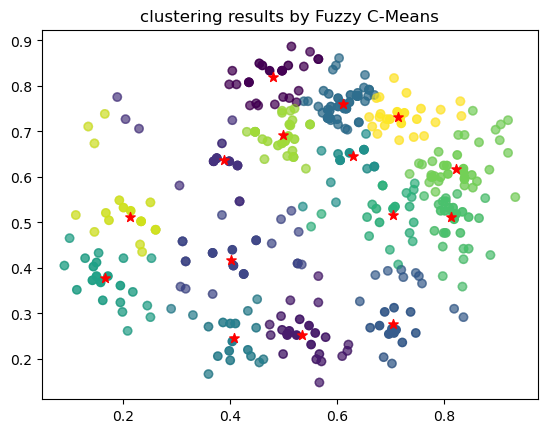

In [9]:
from matplotlib.cm import tab20
label = np.argmax(clusters, axis=0)
for i in range(clusters.shape[0]):
    plt.scatter(x[:,0],x[:,1], c=label, alpha=clusters[i,:])
plt.scatter(centroids[:,0],centroids[:,1],s=50, marker="*", c="red")

plt.title("clustering results by Fuzzy C-Means")    
plt.show()


In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score

#fig, ax = plt.subplots(1,2, figsize=(10, 5), sharex="all", sharey = "all", tight_layout=True)


for i in range(5):
    km = KMeans(n_clusters=K)             #クラスター数, 繰り返し回数の最大値
    clusters_sklearn = km.fit_predict(x_df) #各データ点がどのクラスター所属するか予測 (クラスター中心が最も近いクラスターを選択)
    print(rand_score(clusters_sklearn,libras_movement_df[90])) #２つのクラスタ間の類似性の尺度

    #print(clusters_sklearn)


"""
for i in set(clusters_sklearn):
    idx = clusters_sklearn==i
    plt.scatter(x_df.loc[idx,0],x_df.loc[idx,1],label="cluster "+str(i+1))
    plt.legend()
plt.title("clustering results by K-Means")
  
print(libras_movement_df[90])
    
for j in set(libras_movement_df[90]) :
    idx = libras_movement_df[90]==(j)
    ax[1].scatter(libras_movement_df.loc[idx,0],libras_movement_df.loc[idx,1],label="cluster "+str(j))
    ax[1].legend()
ax[1].set_title("correct data")  
plt.show()

"""


0.8861188486536676
0.8880532342927886
0.8900804704425874
0.8904209223150727
0.8851439182915506


'\nfor i in set(clusters_sklearn):\n    idx = clusters_sklearn==i\n    plt.scatter(x_df.loc[idx,0],x_df.loc[idx,1],label="cluster "+str(i+1))\n    plt.legend()\nplt.title("clustering results by K-Means")\n  \nprint(libras_movement_df[90])\n    \nfor j in set(libras_movement_df[90]) :\n    idx = libras_movement_df[90]==(j)\n    ax[1].scatter(libras_movement_df.loc[idx,0],libras_movement_df.loc[idx,1],label="cluster "+str(j))\n    ax[1].legend()\nax[1].set_title("correct data")  \nplt.show()\n\n'

In [142]:
Validity_measure=[]
for n_clusters in range(2,K+1):
    km = KMeans(n_clusters)             #クラスター数, 繰り返し回数の最大値
    clusters_sklearn = km.fit_predict(x_df) #各データ点がどのクラスター所属するか予測 (クラスター中心が最も近いクラスターを選択)
    dia, dia_max=[], []
    dis, dis_min=[], []
    
    for i in set(clusters_sklearn):
        xi_idx = clusters_sklearn==i 
        xi = x_df.loc[xi_idx,:].to_numpy()
        #print(xi.shape)
        for t in range(xi.shape[0]-1):
            for r in range(t+1,xi.shape[0]):
                dia.append(np.linalg.norm(xi[t]-xi[r]))
        dia_max.append(max(dia))
        for j in set(clusters_sklearn):
            xj_idx = clusters_sklearn==j
            if i != j :
                xj = x_df.loc[xj_idx,:].to_numpy()
                #print(xj.shape)
                for t in range(xi.shape[0]):
                    for r in range(xj.shape[0]):
                        dis.append(np.linalg.norm(xi[t]-xj[r]))
                dis_min.append(min(dis))  
                
    cluster_dia_max = max(dia_max)
    
    Vm=[]
    for n in range(len(dis_min)):
        Vm.append(dis_min[n]/cluster_dia_max)
    
    #print(Vm)
    Validity_measure.append(min(Vm))
    print("n_clusters=",n_clusters,"のとき、Dunnの妥当性基準：",min(Vm))

Validity_measure_max = max(Validity_measure)
Validity_measure_idx = Validity_measure.index(Validity_measure_max)+2
print("n_clusters=",Validity_measure_idx,"のとき最大となる")


n_clusters= 2 のとき、Dunnの妥当性基準： 0.02980726504003687
n_clusters= 3 のとき、Dunnの妥当性基準： 0.038562396744681426
n_clusters= 4 のとき、Dunnの妥当性基準： 0.04859279939404613
n_clusters= 5 のとき、Dunnの妥当性基準： 0.016874369222474827
n_clusters= 6 のとき、Dunnの妥当性基準： 0.02984692428159361
n_clusters= 7 のとき、Dunnの妥当性基準： 0.030184559438367627
n_clusters= 8 のとき、Dunnの妥当性基準： 0.026830946704925304
n_clusters= 9 のとき、Dunnの妥当性基準： 0.036580963599338344
n_clusters= 10 のとき、Dunnの妥当性基準： 0.03963439918526873
n_clusters= 11 のとき、Dunnの妥当性基準： 0.04538280990892799
n_clusters= 12 のとき、Dunnの妥当性基準： 0.021731210976353763
n_clusters= 13 のとき、Dunnの妥当性基準： 0.05608705894151417
n_clusters= 14 のとき、Dunnの妥当性基準： 0.04508703141796119
n_clusters= 15 のとき、Dunnの妥当性基準： 0.09771751511180285
n_clusters= 15 のとき最大となる


In [145]:
libras_movement = pd.read_csv('movement_libras.csv',header = None)
libras_movement_df = pd.DataFrame(libras_movement)
x_df = libras_movement_df.drop(columns=list(map(lambda x:x ,range(2,91))),axis=1)
theta = 2
x = x_df.to_numpy()
n = x_df.shape[0]
inf=999
PC=0
PE=inf
XB=inf
for K in range(2,16): #クラスタ数を2から15まで変化する
    clusters, centroids = FCM(K,n,x,theta)
    #PC
    tmp_PC = PartitionCoefficient(clusters)
    print("n_cluster={}:partition coefficient is {}".format(K,tmp_PC))
    if PC < tmp_PC:
        PC = tmp_PC
        pc_clusternum=K
    #PE
    tmp_PE = PartitionEntropy(clusters)
    print("n_cluster={}:partition entropy is {}".format(K,tmp_PE))
    if PE > tmp_PE:
        PE = tmp_PE
        pe_clusternum=K
    #XB
    tmp_XB = XieBeni(x,centroids,clusters)
    print("n_cluster={}:xie-beni is {}".format(K,tmp_XB))
    if XB > tmp_XB:
        XB = tmp_XB
        xb_clusternum=K
    
print("最終結果\n")
print("分割係数での最良の分割クラスタ数{}\n".format(pc_clusternum))
print("分割エントロピーでの最良の分割クラスタ数{}\n".format(pe_clusternum))
print("Xie-Beni indexでの最良の分割クラスタ数{}\n".format(xb_clusternum))

n_cluster=2:partition coefficient is 0.7457773333333324
n_cluster=2:partition entropy is 0.4053358414703793
n_cluster=2:xie-beni is 0.00021443455478898483
n_cluster=3:partition coefficient is 0.6798211111111111
n_cluster=3:partition entropy is 0.5785813549065709
n_cluster=3:xie-beni is 0.0001530924562304291
n_cluster=4:partition coefficient is 0.6581566222222226
n_cluster=4:partition entropy is 0.6680015759759443
n_cluster=4:xie-beni is 0.00010021611988492411
100
n_cluster=5:partition coefficient is 0.602765566666667
n_cluster=5:partition entropy is 0.8100137358973413
n_cluster=5:xie-beni is 9.445373152993042e-05
100
n_cluster=6:partition coefficient is 0.5849846388888891
n_cluster=6:partition entropy is 0.8802446523647921
n_cluster=6:xie-beni is 9.959857633650556e-05
100
n_cluster=7:partition coefficient is 0.5548700916666672
n_cluster=7:partition entropy is 0.9734943977056663
n_cluster=7:xie-beni is 8.871089070679114e-05
100
n_cluster=8:partition coefficient is 0.5184086027777782
n_c

In [27]:
libras_movement = pd.read_csv('movement_libras.csv',header = None)
libras_movement_df = pd.DataFrame(libras_movement)
x_df = libras_movement_df.drop(columns=list(map(lambda x:x ,range(2,91))),axis=1)
theta = 2
x = x_df.to_numpy()
n = x_df.shape[0]
inf=999
PC = np.array([])
PE = np.array([])
XB = np.array([])
for K in range(10, 101, 10): #クラスタ数を2から15まで変化する
    clusters, centroids = FCM(K,n,x,theta)
    #PC
    PC = np.append(PC, PartitionCoefficient(clusters))
    print("n_cluster={}:partition coefficient is {}".format(K,PC[-1]))

    #PE
    PE = np.append(PE, PartitionEntropy(clusters))
    print("n_cluster={}:partition entropy is {}".format(K,PE[-1]))

    #XB
    XB = np.append(XB, XieBeni(x,centroids,clusters))
    print("n_cluster={}:xie-beni is {}".format(K,XB[-1]))
    
pc_clusternum = np.argmax(PC)+2
pe_clusternum = np.argmax(PE)+2
xb_clusternum = np.argmax(XB)+2
print("最終結果\n")
print("分割係数での最良の分割クラスタ数{}\n".format(pc_clusternum))
print("分割エントロピーでの最良の分割クラスタ数{}\n".format(pe_clusternum))
print("Xie-Beni indexでの最良の分割クラスタ数{}\n".format(xb_clusternum))

n_cluster=10:partition coefficient is 0.4880624833333326
n_cluster=10:partition entropy is 1.1915577037615555
n_cluster=10:xie-beni is 7.680348540306677e-05
n_cluster=20:partition coefficient is 0.4557493111111022
n_cluster=20:partition entropy is 1.4450246529631652
n_cluster=20:xie-beni is 5.12068500725125e-05
100
n_cluster=30:partition coefficient is 0.4517767638888718
n_cluster=30:partition entropy is 1.5633101983597362
n_cluster=30:xie-beni is 3.971416334157464e-05
100
n_cluster=40:partition coefficient is 0.45126564166664396
n_cluster=40:partition entropy is 1.6566223455698097
n_cluster=40:xie-beni is 3.993417467144303e-05
100
n_cluster=50:partition coefficient is 0.4456123111110842
n_cluster=50:partition entropy is 1.7405313551795558
n_cluster=50:xie-beni is 6.0357555037675805e-05
100
n_cluster=60:partition coefficient is 0.47042189444440224
n_cluster=60:partition entropy is 1.6905620921603037
n_cluster=60:xie-beni is 3.2508329106081845e-05
n_cluster=70:partition coefficient is 0

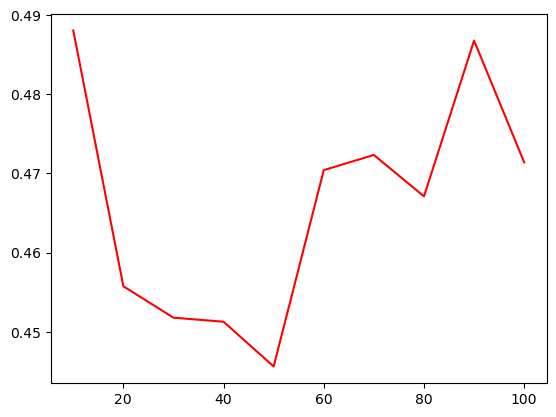

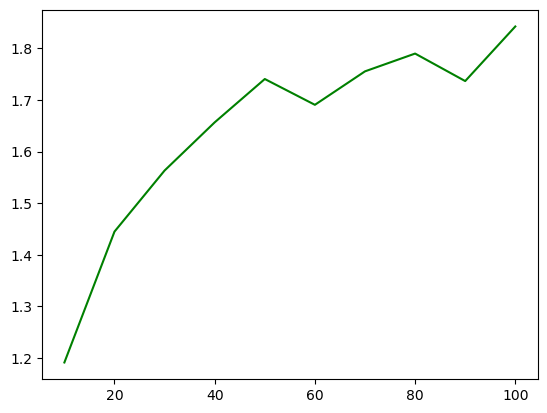

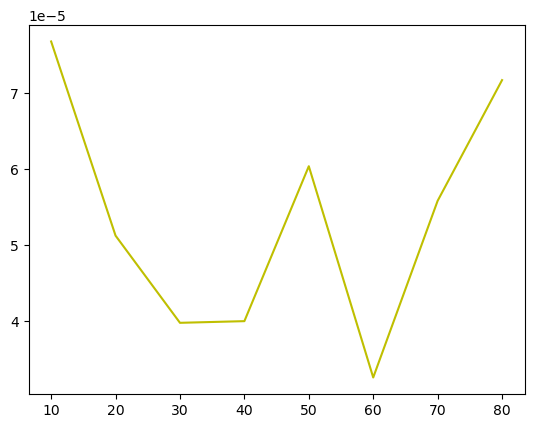

In [28]:

plt.plot(range(10, 101, 10), PC, c="r")
plt.show()
plt.plot(range(10, 101, 10), PE, c="g")
plt.show()
plt.plot(range(10, 101, 10), XB, c="y")
plt.show()


In [110]:
#試し(クラスタ所属確率の初期値(正規化ではない))
import numpy as np
"""
prot1 = np.random.rand(5)
result1 = prot1/prot1.sum()
print(result1,"\n", result1.sum())

result2 = np.zeros((150,3))
prot2 = np.round(np.random.rand(150,3),2)
print(prot2,"\n",prot2.sum(axis=1)) #axis=1:行に沿った処理
for t in range(150):
    result2[t] = np.round(prot2[t]/prot2.sum(axis=1)[t],2)
print(result2,"\n", result2.sum(axis=1))

"""
n=150
K=3
prototype = np.zeros((K,n))
tmp = np.round(np.random.rand(K,n),2)
prototype = np.round(tmp/np.sum(tmp, axis=0, keepdims=True),2)
print(prototype,np.sum(prototype, axis=0))    

[[0.28 0.56 0.41 0.34 0.29 0.31 0.03 0.35 0.64 0.38 0.4  0.3  0.22 0.25
  0.2  0.53 0.24 0.49 0.55 0.06 0.17 0.41 0.2  0.37 0.09 0.47 0.37 0.35
  0.01 0.33 0.31 0.52 0.4  0.21 0.51 0.41 0.66 0.03 0.13 0.27 0.2  0.45
  0.67 0.6  0.09 0.17 0.51 0.43 0.48 0.06 0.33 0.73 0.31 0.65 0.33 0.57
  0.24 0.36 0.51 0.34 0.32 0.66 0.39 0.05 0.39 0.34 0.08 0.19 0.25 0.09
  0.42 0.64 0.27 0.52 0.34 0.25 0.53 0.3  0.61 0.19 0.36 0.36 0.57 0.56
  0.33 0.52 0.04 0.4  0.07 0.48 0.5  0.6  0.09 0.3  0.43 0.39 0.54 0.39
  0.14 0.08 0.28 0.19 0.   0.11 0.11 0.43 0.11 0.33 0.31 0.28 0.47 0.21
  0.29 0.34 0.11 0.14 0.53 0.35 0.38 0.46 0.31 0.34 0.26 0.19 0.49 0.33
  0.13 0.12 0.33 0.63 0.48 0.35 0.04 0.08 0.05 0.04 0.42 0.54 0.52 0.51
  0.18 0.4  0.35 0.14 0.25 0.42 0.52 0.76 0.21 0.32]
 [0.16 0.13 0.32 0.44 0.4  0.47 0.73 0.39 0.36 0.52 0.22 0.56 0.39 0.32
  0.29 0.41 0.34 0.01 0.43 0.61 0.68 0.1  0.65 0.35 0.5  0.14 0.3  0.34
  0.27 0.53 0.68 0.27 0.26 0.4  0.06 0.2  0.3  0.53 0.33 0.52 0.37 0.33
  0.12 0.36